In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [8]:
df = pd.read_csv(r"D:\Work\Route\HTI\S11\K-Means Clustering\income-Kmeans.csv")

In [10]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [12]:
df.drop(['Name'],axis = 1 , inplace = True)

In [14]:
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        22 non-null     int64
 1   Income($)  22 non-null     int64
dtypes: int64(2)
memory usage: 484.0 bytes


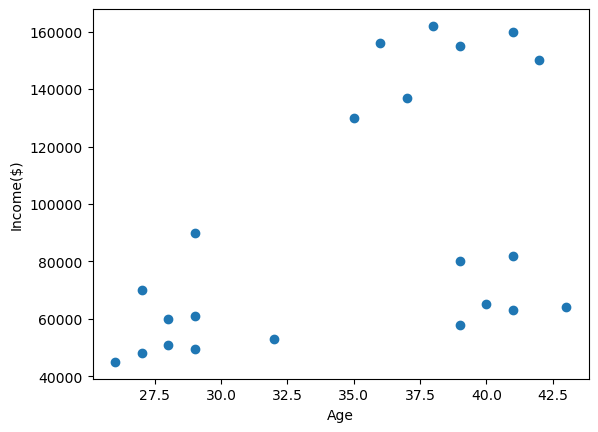

In [26]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [28]:
scaler = MinMaxScaler()

In [30]:
df[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']] )

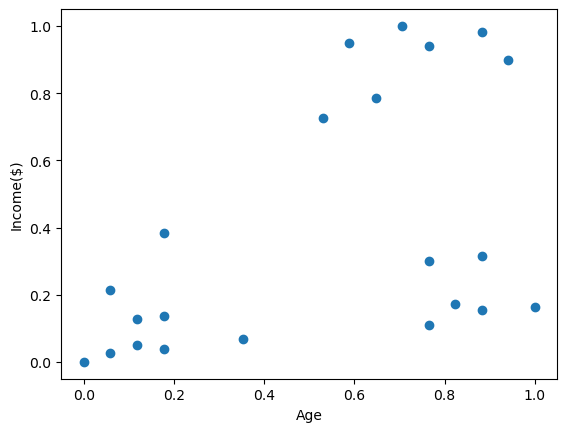

In [32]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [36]:
scores = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters= k)
    kmeans_model.fit(df)
    scores.append(kmeans_model.inertia_)

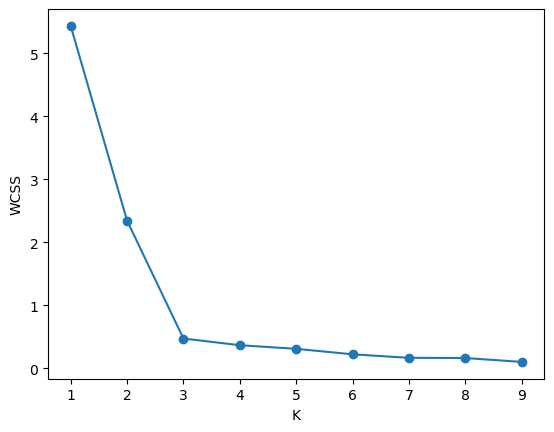

In [42]:
plt.plot(k_range,scores, marker = 'o')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [44]:
scores

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.368773407644059,
 0.3115461388117862,
 0.22462070560435105,
 0.16869711728567788,
 0.1658108462388622,
 0.10383752586603559]

In [48]:
scores = []
k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters= k)
    kmeans_model.fit(df)
    y_pred = kmeans_model.predict(df)
    scores.append(silhouette_score(df,y_pred))
    print('K = ',k,' | ','Score = ',silhouette_score(df,y_pred))

K =  2  |  Score =  0.5600636053855829
K =  3  |  Score =  0.7129710183539274
K =  4  |  Score =  0.5640520649381324
K =  5  |  Score =  0.45057162739849893
K =  6  |  Score =  0.3960139826734706
K =  7  |  Score =  0.4554145806883282
K =  8  |  Score =  0.41983964009387004
K =  9  |  Score =  0.35497227857594305


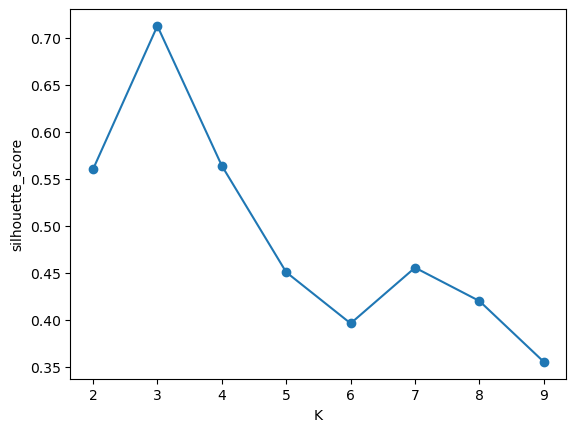

In [50]:
plt.plot(k_range,scores, marker = 'o')
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.show()

## KMeans Model 

In [53]:
model = KMeans(n_clusters= 3)
model.fit(df)
labels = model.predict(df)

In [63]:
labels

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [65]:
df['labels'] = labels

In [67]:
df.head()

,Age,Income($),labels
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [74]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [76]:
df0 = df[df.labels == 0]
df1 =df[df.labels == 1]
df2 = df[df.labels == 2]

In [78]:
df0

,Age,Income($),labels
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0
12,0.058824,0.025641,0
13,0.117647,0.051282,0
14,0.176471,0.038462,0
15,0.352941,0.068376,0


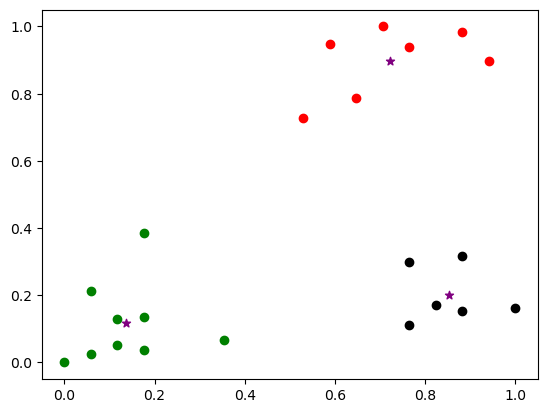

In [88]:
plt.scatter(df0['Age'], df0['Income($)'],color = 'green')
plt.scatter(df1['Age'], df1['Income($)'],color = 'red')
plt.scatter(df2['Age'], df2['Income($)'],color = 'black')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'purple', marker = '*')
plt.show()